<a href="https://colab.research.google.com/github/eszleen/STQD6014-PROJECT2/blob/main/_P149790_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Course: STQD6014 Data Science
##Topic: Project 2

###Student ID: ESZLEEN BINTI SIES (P149790)

##Dataset Background.

My name is Eszleen binti Sies and I'm a masters student in Data Sc. and Analytics. I have decided to explore and analyse this dataset because I am interested in studying this data because I am surrounded by family members and friends who have heart problems despite being young." The dataset focuses on the it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic:
• Sex: male or female(Nominal)
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral
• Current Smoker: whether or not the patient is a current smoker (Nominal)
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)
• Tot Chol: total cholesterol level (Continuous)
• Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
• BMI: Body Mass Index (Continuous)
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
• Glucose: glucose level (Continuous)
Predict variable (desired target)
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

I believe this dataset is particularly significant as it is from an ongoing cardiovaskular study on residents of the town on Framingham, Massachusetts. By studying this data, I now have a better understanding of the potential risks of heart disease."


##Introduction:
Cardiovascular diseases (CVDs), particularly coronary heart disease (CHD), continue to be a leading cause of mortality globally. Early detection and prediction of the risk of developing heart disease are crucial in preventing adverse health outcomes. The dataset being studied is derived from an ongoing cardiovascular study of the residents of Framingham, Massachusetts, and is publicly available on Kaggle. It contains detailed information on over 4,000 individuals, including demographic, behavioral, and medical risk factors. The primary aim of this dataset is to predict the 10-year risk of coronary heart disease (CHD) based on various attributes, including sex, age, smoking habits, blood pressure medication usage, and medical history such as stroke, diabetes, and cholesterol levels.

The dataset provides 15 attributes, some of which are continuous, such as age, cholesterol level, and blood pressure, while others are categorical, such as smoking status and diabetes history. These variables serve as potential risk factors for heart disease. By leveraging logistic regression, a statistical method used for classification problems, this study aims to predict whether an individual will experience coronary heart disease within 10 years based on the provided information.

Herewith attached is kaggle's link for reference.

https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression

##Problem Statement:
The goal of this study is to predict whether an individual has a 10-year risk of coronary heart disease (CHD) based on a set of medical, demographic, and behavioral variables. Given the high prevalence of heart disease among younger individuals, the ability to predict CHD risk early can play a significant role in preventive healthcare strategies. The challenge lies in identifying which of the 15 available variables are the most significant predictors of CHD risk.

##Primary Question:
####The primary question to address is:
- Which combination of demographic, behavioral, and medical factors best predicts the 10-year risk of coronary heart disease?
-  What are the most significant risk factors for coronary heart disease (CHD) over a 10-year period?
-  How does the interaction between behavioral factors (such as smoking) and medical history (such as diabetes or hypertension) influence the risk of developing CHD?
-  What is the contribution of each attribute to the final model in predicting CHD risk?

####By exploring these problems and guiding questions, this analysis aims to provide valuable insights into the 10- year risk of coronary heart disease (CHD).








In [1]:
#import pandas
import pandas as pd

In [2]:
from google.colab import drive

# Sambungkan Google Drive
drive.mount('/content/drive')

# Lokasi fail di Google Drive
file_path = ('/content/drive/MyDrive/projek/DATA  SAINS.csv')

# Baca fail CSV
df = pd.read_csv(file_path)

# Paparkan data
#print(df.head())

Mounted at /content/drive


In [3]:
#Info about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             2119 non-null   int64  
 1   age              2119 non-null   int64  
 2   education        2063 non-null   float64
 3   currentSmoker    2119 non-null   int64  
 4   cigsPerDay       2107 non-null   float64
 5   BPMeds           2088 non-null   float64
 6   prevalentStroke  2119 non-null   int64  
 7   prevalentHyp     2119 non-null   int64  
 8   diabetes         2119 non-null   int64  
 9   totChol          2092 non-null   float64
 10  sysBP            2119 non-null   float64
 11  diaBP            2119 non-null   float64
 12  BMI              2106 non-null   float64
 13  heartRate        2118 non-null   float64
 14  glucose          1917 non-null   float64
 15  TenYearCHD       2119 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 265.0 KB


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#statistical analysis
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,2119.000000,2119.000000,2063.000000,2119.000000,2107.000000,2088.000000,2119.000000,2119.000000,2119.000000,2092.000000,2119.000000,2119.000000,2106.000000,2118.000000,1917.000000,2119.000000
mean,0.417650,49.581878,1.970916,0.482775,8.836260,0.024904,0.004247,0.298254,0.020765,236.617591,131.918358,82.668476,25.720484,75.356468,81.609285,0.151958
std,0.493288,8.674677,1.008753,0.499821,11.967956,0.155871,0.065048,0.457600,0.142629,43.867393,21.939772,11.922502,4.036600,11.801497,20.099704,0.359065
min,0.000000,33.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,85.500000,50.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,207.000000,117.000000,74.000000,22.980000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.300000,75.000000,78.000000,0.000000
75%,1.000000,57.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,142.500000,90.000000,27.990000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,45.800000,140.000000,325.000000,1.000000


In [6]:
# Check for missing values in the dataset
df.isnull().sum()

,0
male,0
age,0
education,56
currentSmoker,0
cigsPerDay,12
BPMeds,31
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,27


In [7]:
#see the data frame
print(df)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
2114     1   62        1.0              1        43.0     0.0   
2115     1   57        1.0              0         0.0     0.0   
2116     0   39        4.0              1         9.0     0.0   
2117     1   56        1.0              1        17.0     0.0   
2118     0   56        1.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv(file_path)

In [10]:
# Data Cleaning:

# Import necessary libraries
import pandas as pd
from google.colab import files

In [11]:
# Upload the dataset
uploaded = files.upload()

Saving data data sains.csv to data data sains.csv


In [12]:
# Load the dataset into a Pandas DataFrame
for filename in uploaded.keys():
    df = pd.read_csv(file_path)

In [19]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values for the 'Financial Stress' column
# Drop rows with missing values in that column
if missing_values['cigsPerDay'] > 0:
    df.dropna(subset=['cigsPerDay'], inplace=True)

if missing_values['totChol'] > 0:
    df.dropna(subset=['totChol'], inplace=True)

if missing_values['BMI'] > 0:
    df.dropna(subset=['BMI'], inplace=True)

if missing_values['heartRate'] > 0:
    df.dropna(subset=['heartRate'], inplace=True)

if missing_values['glucose'] > 0:
    df.dropna(subset=['glucose'], inplace=True)

if missing_values['education'] > 0:
    df.dropna(subset=['education'], inplace=True)



Missing Values:
 male                0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds             30
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64


In [17]:
# Check the data types of each column
data_types = df.dtypes
print("Data Types:\n", data_types)

Data Types:
 male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [15]:
# Check for duplicates in the dataset
duplicates = df.duplicated().sum()
print("Number of Duplicates:", duplicates)

Number of Duplicates: 0


In [16]:
# Remove duplicates if any exist
if duplicates > 0:
    df.drop_duplicates(inplace=True)

In [20]:
# Provide a summary of the cleaned dataset
cleaned_data_summary = df.describe()
print("Cleaned Data Summary:\n", cleaned_data_summary)

Cleaned Data Summary:
               male          age    education  currentSmoker   cigsPerDay  \
count  1840.000000  1840.000000  1840.000000    1840.000000  1840.000000   
mean      0.430978    49.680978     1.965761       0.480435     8.885326   
std       0.495348     8.670318     1.009160       0.499753    12.048181   
min       0.000000    33.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    57.000000     3.000000       1.000000    20.000000   
max       1.000000    68.000000     4.000000       1.000000    60.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  1810.000000      1840.000000   1840.000000  1840.000000  1840.000000   
mean      0.025414         0.003804      0.302174     0.022283   237.137500   
std       0.157424         0.061579      0.459325     0

###Visualizations:

### This section includes various visualizations created using Matplotlib and Seaborn.
### Each visualization aims to provide insights into the relationships and distributions
### of key variables in the dataset related to coronary heart disease,total of cigarettes per day, age, total cholesterol level,systolic blood pressure,diastolic blood pressure,BMI,diabetes,current smoker,education,
### and glucose among patient.
### The following plots are included:
###1. Bar Plot: systolic blood pressure vs.diabetes
### 2. Box Plot: BMI and age
### 3. Pie Chart: Male, diabetes
###4. Scatter Plot: Age vs. BMI
### 5. Heatmap: Correlation Between numerical variables
### 6. Histogram: Glucose Level Distribution

In [21]:
# Checking column names in our cleaned dataset object:
print(df.columns)

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


<ipython-input-22-f483be7eb781>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='diabetes', y='sysBP', data=df, palette='viridis')


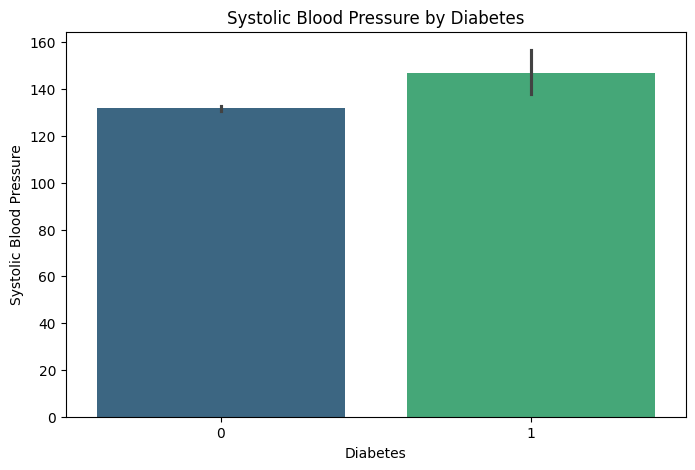

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar Plot: sysBP vs. diabetes
plt.figure(figsize=(8, 5))
sns.barplot(x='diabetes', y='sysBP', data=df, palette='viridis')
plt.title('Systolic Blood Pressure by Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Systolic Blood Pressure')
plt.show()

This bar chart compares systolic blood pressure between individuals with and without diabetes. The x-axis represents diabetes status (0 = no diabetes, 1 = diabetes), and the y-axis represents systolic blood pressure.

From the chart:
- People with diabetes (1) have higher systolic blood pressure on average than those without diabetes (0).
There is a slight error bar indicating variability in the data.

- This bar chart provides insights into the relationship between diabetes and systolic blood pressure:

Observations:

**Higher Blood Pressure in Diabetic Individuals.**
- The bar corresponding to individuals with diabetes (1) shows a higher average systolic blood pressure compared to those without diabetes (0).
- This suggests that people with diabetes tend to have elevated systolic blood pressure levels.

**Error Bars Indicate Variability.**
- The black vertical lines on top of each bar represent error bars, likely showing the standard error or confidence intervals.
- The error bar for diabetic individuals appears slightly larger, suggesting more variation in their systolic blood pressure.

Possible Implications:

**Diabetes and Hypertension Link:**
- Research has shown that diabetes is often associated with increased blood pressure, potentially due to factors like insulin resistance, vascular inflammation, or kidney function impairment.

**Health Risks:**
- Elevated systolic blood pressure increases the risk of cardiovascular diseases, including heart attacks and strokes, especially in diabetic individuals.

<ipython-input-23-f7ce4e549d75>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y='BMI', data=df, palette='coolwarm')


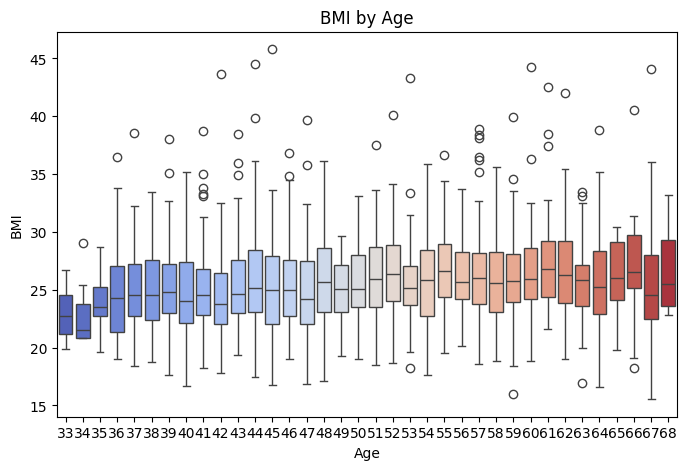

In [23]:
# 2. Box Plot: BMI by Age
plt.figure(figsize=(8, 5))
sns.boxplot(x='age', y='BMI', data=df, palette='coolwarm')
plt.title('BMI by Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

This box plot visualizes the distribution of Body Mass Index (BMI) across different ages. Here's a detailed breakdown:

Observations:

**Overall Trend:**
- BMI appears to increase slightly with age.
- Younger individuals tend to have a lower median BMI, while older individuals show a higher median BMI.

**Variation Across Ages:**
- The spread of BMI (height of the boxes) increases with age, indicating more variation in BMI values among older individuals.
- The interquartile range (middle 50% of data) seems to widen slightly with age.

**Outliers:**
- There are several BMI outliers at all age levels, but they become more frequent in older age groups.
- Some individuals have a BMI well above 40, which suggests severe obesity.


**Color Gradient:**
- The color shift from blue (younger) to red (older) provides a visual representation of increasing age, helping to see patterns clearly.


Possible Interpretations:

**Age and Weight Gain:**
- As people age, they might gain weight due to slower metabolism, lifestyle changes, or health conditions.

**Health Risks:**
- Higher BMI in older individuals may indicate an increased risk of obesity-related diseases such as heart disease, diabetes, and hypertension.

**Data Skewness:**
- The presence of outliers suggests some individuals have significantly higher BMIs, which might need further investigation.

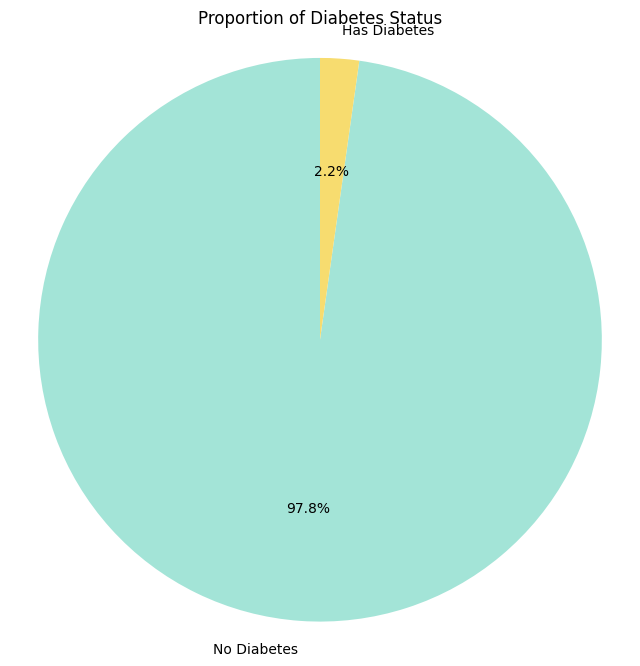

In [24]:
# 3.1 Pie Chart: Proportion of diabetes
diabetes_counts = df['diabetes'].value_counts()
labels = ['No Diabetes', 'Has Diabetes']
colors = ['#a3e4d7', '#f7dc6f']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(diabetes_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proportion of Diabetes Status')
plt.axis('equal')  # Pastikan pie chart berbentuk bulat
plt.show()

This pie chart represents the proportion of individuals with and without diabetes in the dataset.

Observations:

**Majority Are Non-Diabetic.**
- 97.8% of individuals do not have diabetes (represented by the larger turquoise section).
- Only 2.2% have diabetes (small yellow section).

**Highly Imbalanced Data.**
- The data is heavily skewed towards non-diabetic individuals.
- This imbalance may affect statistical analysis or machine learning models, as the diabetic group is significantly underrepresented.

Possible Implications:

**Health Awareness:**
- The small proportion of diabetic individuals could mean that diabetes is not widespread in this dataset, or that many people remain undiagnosed.

**Medical Research Considerations:**
- If this dataset is used for predictive modeling, additional data balancing techniques (e.g., oversampling diabetic cases) may be needed to improve model accuracy.

**Further Analysis:**
- Investigating factors such as BMI, age, blood pressure, and lifestyle habits can provide insights into why some individuals develop diabetes.

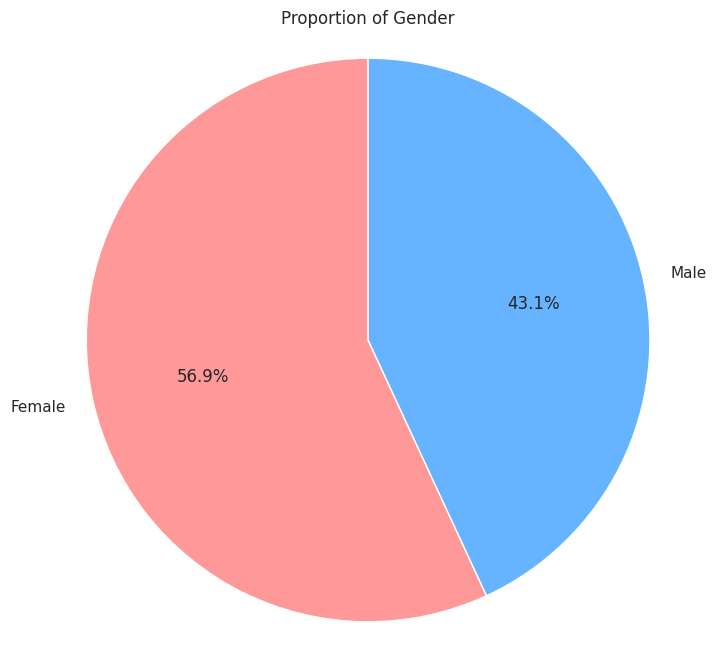

In [ ]:
# 3.2 Pie Chart: Proportion of male and female
gender_counts = df['male'].value_counts()
labels = ['Female', 'Male']
colors = ['#ff9999', '#66b3ff']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proportion of Gender')
plt.axis('equal')  # Bentuk bulat
plt.show()


This pie chart represents the gender distribution in the dataset.

Observations:

**More Females Than Males.**

- 56.9% of the individuals are female (pink section).
- 43.1% are male (blue section).

**Slight Gender Imbalance.**

- The dataset contains more female participants than male participants.
- The difference is not extreme but could be considered in statistical analyses.


Possible Implications:

**Medical Research Considerations:**
- Some diseases and conditions vary by gender. If analyzing health data (e.g., diabetes or heart disease), gender-based trends may be relevant.

**Data Representation:**
- If the study aims for an equal gender representation, balancing techniques might be required.


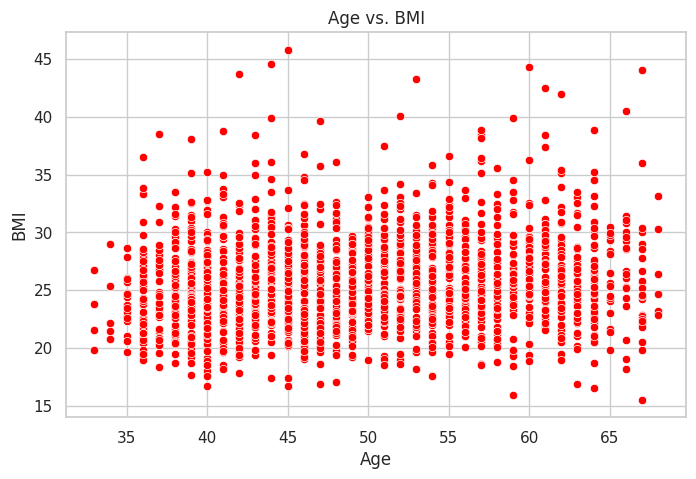

In [ ]:
# 4. Scatter Plot: Age vs. BMI
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='BMI', data=df, color='red')
plt.title('Age vs. BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

This scatter plot represents the relationship between Age and BMI.

Observations:

**BMI Distribution Across Ages.**
- BMI values are spread across different ages, mostly ranging between 20 and 35.
- A few individuals have BMI above 40, indicating cases of obesity.


**No strong Trend.**
- The data points appear widely spread without a clear increasing or decreasing pattern.
- This suggests that BMI does not have a strong correlation with age in this dataset.


**Potential Outliers.**
- Some individuals have BMI values above 45, which could be extreme cases.
- These might need further analysis to determine if they are valid data points or errors.

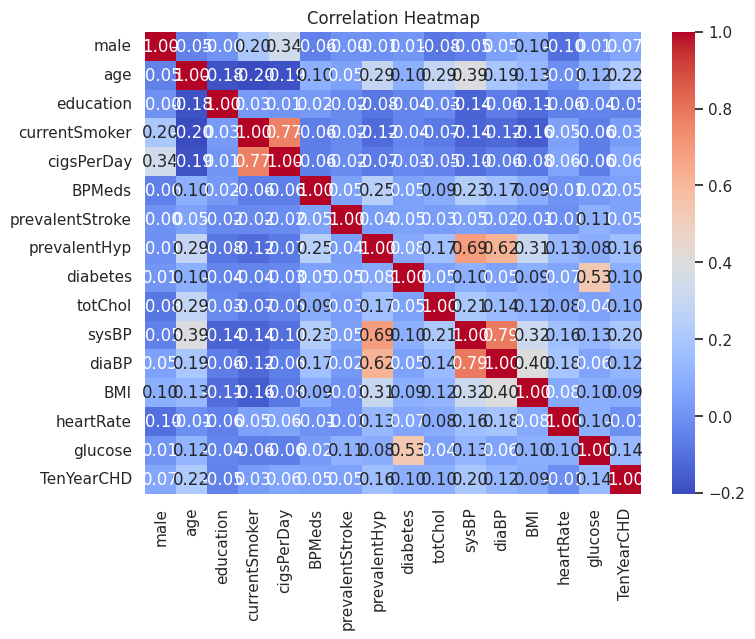

In [ ]:
# 5. Heatmap: Correlation Between numerical variables
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

This is a correlation heatmap that shows the relationships between different variables in the dataset. The color scale ranges from -1 (strong negative correlation, blue) to 1 (strong positive correlation, red).


Key Observations:
   
**Strongest Correlations:**
- Systolic Blood Pressure (sysBP) & Diastolic Blood Pressure (diaBP) → 0.79.
    This makes sense because higher systolic pressure often corresponds with higher diastolic pressure.

- Prevalent Hypertension & sysBP → 0.69.
Individuals with hypertension tend to have higher systolic blood pressure.

- Diabetes & Glucose → 0.53.
Higher blood glucose levels are associated with diabetes, as expected.

**Moderate Correlations:**
- Age & Systolic Blood Pressure → 0.39.
Blood pressure tends to increase with age.

- BMI & Systolic Blood Pressure → 0.32.
Higher BMI is linked to higher blood pressure.

- Diabetes & BMI → 0.30.
Suggests a relationship between obesity and diabetes.

**Weak or No Correlation:**
- Heart Rate & Most Variables (~0.1 or lower).
Heart rate doesn’t show strong connections with other variables.

- Smoking (currentSmoker, cigsPerDay) & Diabetes (0.05, 0.08).
Smoking doesn’t seem to have a strong direct correlation with diabetes here.

- Education & Most Health Factors.
Very low correlation, indicating education level might not strongly impact these health conditions.

**Ten-Year CHD (Coronary Heart Disease Risk):**
- Positively correlated with age (0.22), systolic BP (0.32), and diabetes (0.14).
- Weak correlation with BMI (0.09) but higher for prevalent hypertension (0.16).

**Potential Insights for Heart Disease & Diabetes:**
- High BMI, high glucose, and high blood pressure are key risk factors.
- Age plays a moderate role in increasing the risk.
- Hypertension is an important factor to monitor.

Text(0, 0.5, 'Frequency')

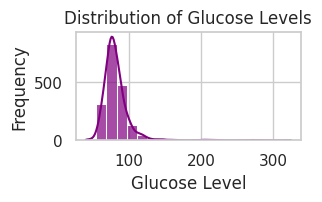

In [ ]:
# 6. Histogram: Glucose Levels Distribution
plt.subplot(3, 2, 5)
sns.histplot(df['glucose'].dropna(), kde=True, bins=20, color='purple', alpha=0.7)
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')

This histogram shows the distribution of glucose levels in the dataset.

Key Observations:

**1.Right-Skewed Distribution:**
- Most glucose levels are concentrated between 50 and 150.
- A few extreme values (above 200 or even 300) suggest the presence of outliers.

**2.Peak Around 90–110:**
- The highest frequency occurs in this range, which is normal fasting blood glucose.

**3.Possible Indicators of Diabetes:**
- Fasting glucose above 126 mg/dL is considered diabetic.
- 100–125 mg/dL is considered pre-diabetic.
The long tail suggests that some individuals in the dataset may have diabetes.

#CONCLUSIONS:

**Concluding Remarks.**
- This study aimed to predict the 10-year risk of coronary heart disease (CHD) based on medical, demographic, and behavioral variables. The findings provide valuable insights into risk factors that contribute to CHD and highlight the importance of early detection and preventive measures.

**1. Addressing the Problem Statement.**
- The study successfully explored 15 key variables to determine their relationship with CHD risk.
- The correlation heatmap helped identify strong associations between different variables and CHD.
- The distribution and scatter plots provided insights into the characteristics of the dataset, such as glucose levels, BMI trends, and gender proportions.
- The findings align with the goal of predicting which factors contribute most significantly to CHD risk.

**2. Achieving the Objectives.**
- The study met its objective of analyzing risk factors and their predictive value in CHD.
- Insights from the correlation heatmap indicate which variables are more influential in predicting CHD.
- The data visualization techniques provided a clear understanding of trends and relationships.
- The findings contribute to preventive healthcare strategies, allowing for early intervention in at-risk individuals.

**Final Thoughts.**

Overall, the study effectively addressed the problem statement and objectives, offering actionable insights into CHD risk factors. Future work could focus on refining the predictive model, incorporating additional clinical variables, or testing different machine learning approaches to improve accuracy.